**CONFIDENCE INTERVALS FOR A DIFFERENCE IN MEANS**

#### Problem (Ch 7, page 136)

A major retailer considers switching vendors for its ultrasonic humidifiers. Vendor A is the current supplier and vendor B is offering a lower wholesale price and better commercial terms overall. Before deciding to switch, however, the retailer decides to test the efficiency of the two products—the rate at which they humidify the air (smaller better). The retailer decides to compare a sample of humidifiers from each vendor, with the results shown in Table. 

---

***Question:*** *What decision should the retailer make? Stick with A? Switch to B?*

---

In [64]:
#In here I simply re-create the table (not necessary, but it is good practice)
import pandas as pd
import numpy as np

#Data
vendor_A= {'index': [0,1,2,3,4,5,6,7,8,9,10,11],
    'Vendor_A':[14.2,15.1,13.9,12.8,13.7,14.0,13.5,14.3,14.9,13.1,13.4,13.2]}
vendor_B= {'index': [0,1,2,3,4,5,6,7,8,9,10,11],
    'Vendor_B':[12.4,13.6,14.6,12.8,11.9,13.1,12.8,13.2,14.7,14.5,np.NaN,np.NaN]}

#Create DataFrames
A = pd.DataFrame(vendor_A)
B = pd.DataFrame(vendor_B)

#Merge
data = pd.merge(A,B)
table = data[['Vendor_A','Vendor_B']]

#Display
display(table)

#Statistics 
#means
mean_a = table["Vendor_A"].mean()
mean_b = table['Vendor_B'].dropna().mean()
print('Vendor A mean: ',mean_a)
print('Vendor B mean: ',mean_b)

#pointe estimate is going to be the differene in means
mean_diff = mean_a-mean_b
print('Vendor A mean minus Vendor B mean: ', mean_diff) 

,Vendor_A,Vendor_B
0,14.2,12.4
1,15.1,13.6
2,13.9,14.6
3,12.8,12.8
4,13.7,11.9
5,14.0,13.1
6,13.5,12.8
7,14.3,13.2
8,14.9,14.7
9,13.1,14.5


Vendor A mean:  13.841666666666667
Vendor B mean:  13.360000000000003
Vendor A mean minus Vendor B mean:  0.4816666666666638


Fifth percentile 50
Ninty fifth percentile  950
90% Confidence Interval (-0.10499999999999865, 1.0266666666666673)




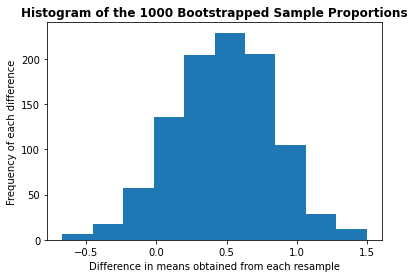

<Figure size 3600x1440 with 0 Axes>

In [79]:
''' 
The rationale from the book
"How much might it be in error, based simply on the luck of the draw in selecting humidifiers for the sample? If we or the decision-maker base a decision solely upon the point estimate, it is not a complete picture. 
We need to couple the point estimate with a confidence interval that brackets it. The confidence interval procedure asks “How would this result differ if we drew manyadditional samples?” 
It is not feasible to draw lots of new samples, but we can draw resam-ples and observe their behavior.
'''
#Resmpling procedure (Bootstrap)
'''
  (1) Box A has 12 slips of paper with the 12 values for Vendor A
  (2) Box B has 10 slips of paper with the 10 values for Vendor B
  (3) Draw a sample of 12 with replacement from Box A and record the mean
  (4) Draw a sample of 10 with replacement from Box B and record the mean
  (5) Record the difference—Mean A minus Mean B
  (6) Repeat steps three through five 1000 times.
  (7) Review the distribution of the 1000 resampled means by creating a histogram and findthe 5th and 95th percentiles. 
      These are the bounds of a 90% confidence interval. 
'''
#Create the two boxes
box_a = table["Vendor_A"].to_list()
box_b =table["Vendor_B"].dropna().to_list()

resample_mean_diff = []
#Bootstrap 
for x in range(1000):
  temp_a=0.0
  temp_b=0.0
  #Resample & mean from box A
  for y in range(12):
    index_a= np.random.randint(0,12)
    temp_a += box_a[index_a]
  temp_a=temp_a/12

  #Resample & mean from box B
  for x in range(10):
    index_b= np.random.randint(0,10)
    temp_b +=box_b[index_b]
  temp_b = temp_b/10

  diff_mean= temp_a -temp_b
  resample_mean_diff.append(diff_mean)

#How about a confidence interval? Say, 90% CI
resample_mean_diff = sorted(resample_mean_diff, reverse=False) #sort the list of proportions
fifth_p = int(0.05*int(len(resample_mean_diff))) #5th percentile
ninty_fifth_p= int(0.95*int(len(resample_mean_diff))) #95th percentile

print('Fifth percentile',fifth_p)
print('Ninty fifth percentile ', ninty_fifth_p)
print('90% Confidence Interval', (resample_mean_diff[fifth_p], resample_mean_diff[ninty_fifth_p]))
print('\n')

'''
Conclusion: we got an interval of the possible values with a 90% CI. Now for an acutal answer to the original question, we would have to 
            dig a bit deeper. Perhaps, an hypothesis testing and p-value set up would be necessary. I will cover it in subsequent simulation.
            For the moment, this was an overview of how to compute CI. 
'''
#Graphical Reppresentation
import matplotlib.pyplot as plt
_=plt.hist(resample_mean_diff)
_=plt.title('Histogram of the 1000 Bootstrapped Sample Proportions', fontweight='bold')
_=plt.xlabel('Difference in means obtained from each resample')
_=plt.ylabel('Frequency of each difference')
_=plt.figure(figsize=(50,20))